In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=101)

In [4]:
df = pd.read_csv('ppg_churn.csv')

In [5]:
df['lump_x19'] = np.where( df.X19 > 3, 'Other', df.X19.astype('str'))

In [6]:
df['X06_trans'] = np.log(df.X06 + 0.001)

In [7]:
df = df.drop(columns=['X06', 'X19'])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df_clean = df.select_dtypes('number').copy()

In [10]:
X = StandardScaler().fit_transform(df_clean)

In [11]:
df_main = pd.DataFrame(X, columns=df_clean.columns)

In [12]:
df['churn'] = np.where( df.churn == 'yes', '1','0')

In [13]:
df['churn'] = df.churn.astype(int)

In [14]:
df.churn.value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [15]:
df_main['churn'] = df.churn.copy()
df_main['state'] = df.state.copy()
df_main['X03'] = df.X03.copy()
df_main['X04'] = df.X04.copy()
df_main['X05'] = df.X05.copy()
df_main['lump_X19'] = df.lump_x19.copy()

In [16]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.model_selection import cross_val_score

In [53]:
import statsmodels.formula.api as smf

In [54]:
fit_01 = smf.logit(formula = formula_1, data = df_main).fit()

Optimization terminated successfully.
         Current function value: 0.368005
         Iterations 9


In [55]:
fit_06 = smf.logit(formula = formula_6, data = df_main).fit()

Optimization terminated successfully.
         Current function value: 0.375739
         Iterations 8


In [56]:
fit_07 = smf.logit(formula = formula_7, data = df_main).fit()

Optimization terminated successfully.
         Current function value: 0.386547
         Iterations 6


In [18]:
formula_7 = 'churn ~ np.power(X02, 4) + np.power(X07, 4) + np.power(X08, 4) + np.power(X09, 4) + np.power(X10, 4) + np.power(X11, 4) + np.power(X12, 4) + np.power(X13, 4) + np.power(X14, 4) + np.power(X15, 4) + np.power(X16, 4) + np.power(X17, 4) + np.power(X18, 4) + np.power(X06_trans, 4)'

In [19]:
y_07, X_07 = dmatrices(formula_7 + ' - 1', data = df_main)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
ridge_tune_results = LogisticRegressionCV(penalty='l2', Cs=101, cv=my_cv, solver='lbfgs', max_iter=5001, fit_intercept=False).\
fit(X_07, y_07.ravel())

In [22]:
ridge_tune_results.C_

array([0.00131826])

In [23]:
ridge_tune_results.scores_.keys()

dict_keys([1.0])

In [24]:
ridge_tune_results.scores_[1.0].shape

(10, 101)

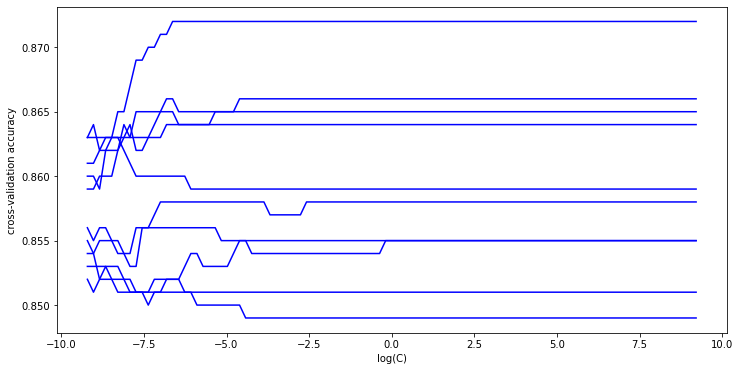

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(ridge_tune_results.Cs_), ridge_tune_results.scores_[1.0].T, 'b-')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")

plt.show()

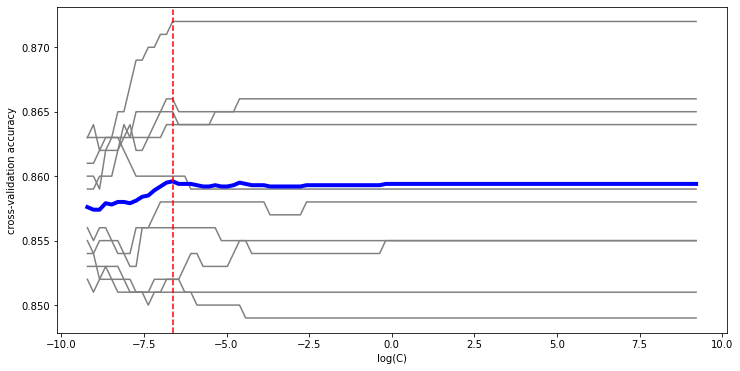

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(ridge_tune_results.Cs_), ridge_tune_results.scores_[1.0].T, color='grey')
ax.plot(np.log(ridge_tune_results.Cs_), ridge_tune_results.scores_[1.0].mean(axis=0), color='blue', linewidth=4)
ax.axvline(x=np.log(ridge_tune_results.C_), color='red', linestyle='dashed')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")

plt.show()

In [27]:
lasso_tune_results = LogisticRegressionCV(penalty='l1', Cs=101, cv=my_cv, solver='saga', max_iter=5001, fit_intercept=False).\
fit(X_07, y_07.ravel())

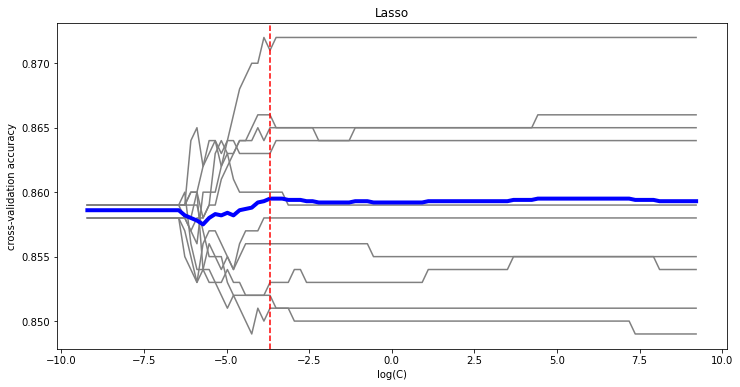

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(lasso_tune_results.Cs_), lasso_tune_results.scores_[1.0].T, color='grey')
ax.plot(np.log(lasso_tune_results.Cs_), lasso_tune_results.scores_[1.0].mean(axis=0), color='blue', linewidth=4)
ax.axvline(x=np.log(lasso_tune_results.C_), color='red', linestyle='dashed')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")
ax.set_title("Lasso")

plt.show()

In [29]:
print( ridge_tune_results.coef_)

[[-0.05356511  0.00854371 -0.01471822  0.00877587 -0.01921371 -0.05633368
  -0.01927549 -0.02506882 -0.05828091 -0.02492307 -0.01260999 -0.00152328
  -0.01420572 -0.22494039]]


In [30]:
print( lasso_tune_results.coef_ )

[[-0.05315368  0.00833547 -0.01385127  0.00873802 -0.01855029 -0.05601582
  -0.01860661 -0.02462038 -0.05791479 -0.0239133  -0.00784813 -0.00146042
  -0.01780166 -0.24298322]]


In [36]:
formula_6 = 'churn ~ np.power(X02, 2) + np.power(X07, 2) + np.power(X08, 2) + np.power(X09, 2) + np.power(X10, 2) + np.power(X11, 2) + np.power(X12, 2) + np.power(X13, 2) + np.power(X14, 2) + np.power(X15, 2) + np.power(X16, 2) + np.power(X17, 2) + np.power(X18, 2) + np.power(X06_trans, 2) '

In [37]:
y_06, X_06 = dmatrices(formula_6 + ' - 1', data = df_main)

In [38]:
ridge_tune_results_6 = LogisticRegressionCV(penalty='l2', Cs=101, cv=my_cv, solver='lbfgs', max_iter=5001, fit_intercept=False).\
fit(X_06, y_06.ravel())

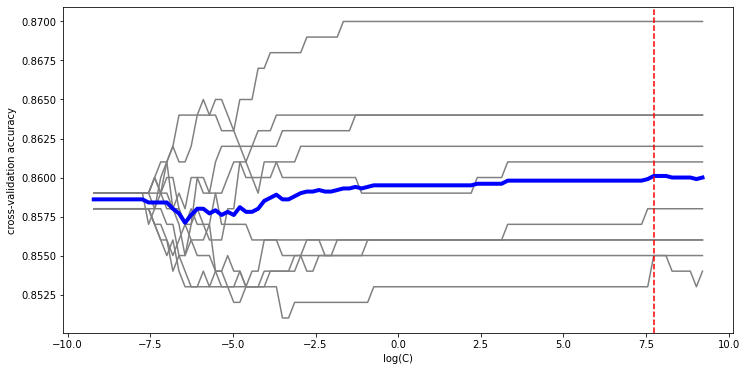

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(ridge_tune_results_6.Cs_), ridge_tune_results_6.scores_[1.0].T, color='grey')
ax.plot(np.log(ridge_tune_results_6.Cs_), ridge_tune_results_6.scores_[1.0].mean(axis=0), color='blue', linewidth=4)
ax.axvline(x=np.log(ridge_tune_results_6.C_), color='red', linestyle='dashed')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")

plt.show()

In [40]:
lasso_tune_results_6 = LogisticRegressionCV(penalty='l1', Cs=101, cv=my_cv, solver='saga', max_iter=5001, fit_intercept=False).\
fit(X_06, y_06.ravel())

C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


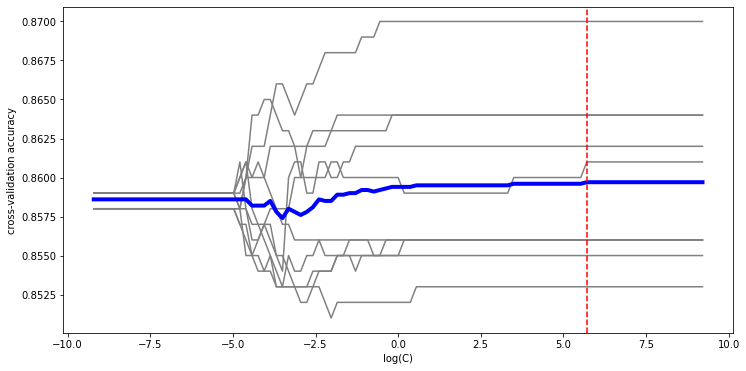

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(lasso_tune_results_6.Cs_), lasso_tune_results_6.scores_[1.0].T, color='grey')
ax.plot(np.log(lasso_tune_results_6.Cs_), lasso_tune_results_6.scores_[1.0].mean(axis=0), color='blue', linewidth=4)
ax.axvline(x=np.log(lasso_tune_results_6.C_), color='red', linestyle='dashed')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")

plt.show()

In [49]:
print( ridge_tune_results.coef_)

[[-0.05356511  0.00854371 -0.01471822  0.00877587 -0.01921371 -0.05633368
  -0.01927549 -0.02506882 -0.05828091 -0.02492307 -0.01260999 -0.00152328
  -0.01420572 -0.22494039]]


In [50]:
print( lasso_tune_results.coef_ )

[[-0.05315368  0.00833547 -0.01385127  0.00873802 -0.01855029 -0.05601582
  -0.01860661 -0.02462038 -0.05791479 -0.0239133  -0.00784813 -0.00146042
  -0.01780166 -0.24298322]]


In [42]:
formula_3 = 'churn ~ state + X03 + X04 + X05 + lump_X19'

In [43]:
y_03, X_03 = dmatrices(formula_3 + ' - 1', data = df_main)

In [45]:
ridge_tune_results_3 = LogisticRegressionCV(penalty='l2', Cs=101, cv=my_cv, solver='lbfgs', max_iter=5001, fit_intercept=False).\
fit(X_03, y_03.ravel())

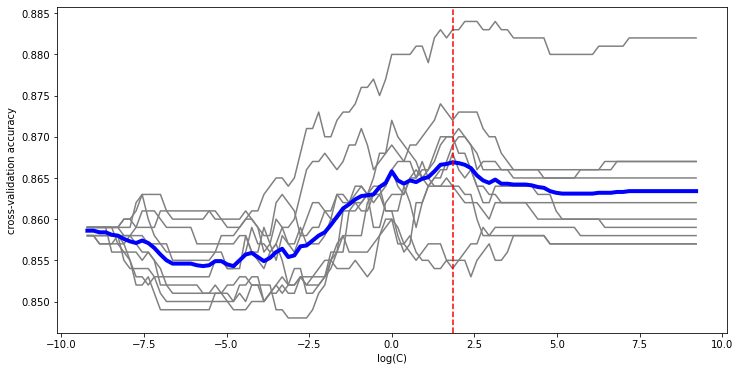

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(ridge_tune_results_3.Cs_), ridge_tune_results_3.scores_[1.0].T, color='grey')
ax.plot(np.log(ridge_tune_results_3.Cs_), ridge_tune_results_3.scores_[1.0].mean(axis=0), color='blue', linewidth=4)
ax.axvline(x=np.log(ridge_tune_results_3.C_), color='red', linestyle='dashed')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")

plt.show()

In [47]:
lasso_tune_results_3 = LogisticRegressionCV(penalty='l1', Cs=101, cv=my_cv, solver='saga', max_iter=5001, fit_intercept=False).\
fit(X_03, y_03.ravel())

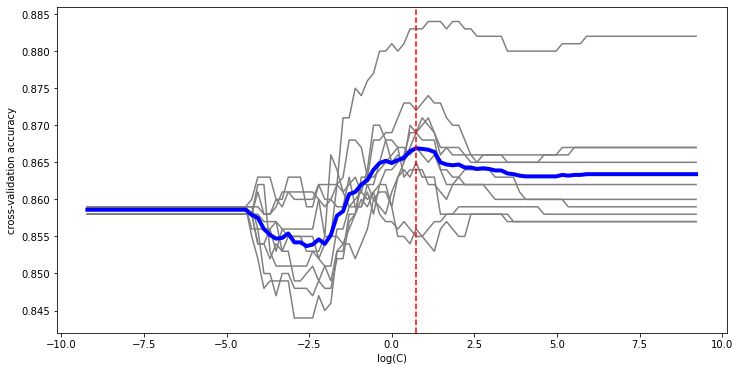

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.log(lasso_tune_results_3.Cs_), lasso_tune_results_3.scores_[1.0].T, color='grey')
ax.plot(np.log(lasso_tune_results_3.Cs_), lasso_tune_results_3.scores_[1.0].mean(axis=0), color='blue', linewidth=4)
ax.axvline(x=np.log(lasso_tune_results_3.C_), color='red', linestyle='dashed')
ax.set_xlabel('log(C)')
ax.set_ylabel("cross-validation accuracy")

plt.show()

In [51]:
print( ridge_tune_results.coef_)

[[-0.05356511  0.00854371 -0.01471822  0.00877587 -0.01921371 -0.05633368
  -0.01927549 -0.02506882 -0.05828091 -0.02492307 -0.01260999 -0.00152328
  -0.01420572 -0.22494039]]


In [52]:
print( lasso_tune_results.coef_ )

[[-0.05315368  0.00833547 -0.01385127  0.00873802 -0.01855029 -0.05601582
  -0.01860661 -0.02462038 -0.05791479 -0.0239133  -0.00784813 -0.00146042
  -0.01780166 -0.24298322]]
